In [7]:
import torch
import matplotlib.pyplot as plt
import numpy as np

import random

from utils_notebook import get_logits_targets, modal_probs_decreasing

## Figure 1

In [8]:
MODEL_FOLDER = 'models'
LIKELIHOOD = 'softmax'
EPOCH = 299

logits, targets, ARGS = get_logits_targets('cifar100', MODEL_FOLDER, LIKELIHOOD, EPOCH)

L = len(logits)
N = len(targets)

building network of steps: 
[4, 2, 2, 2, 2, 2, 2] 16
 ********************** Block 1  **********************
|		inScales 3 outScales 3 inChannels 16 outChannels 6		|

|		inScales 3 outScales 3 inChannels 22 outChannels 6		|

|		inScales 3 outScales 3 inChannels 28 outChannels 6		|

|		inScales 3 outScales 3 inChannels 34 outChannels 6		|

 ********************** Block 2  **********************
|		inScales 3 outScales 3 inChannels 40 outChannels 6		|

|		inScales 3 outScales 3 inChannels 46 outChannels 6		|

 ********************** Block 3  **********************
|		inScales 3 outScales 2 inChannels 52 outChannels 6		|
|		Transition layer inserted! (max), inChannels 58, outChannels 29	|

|		inScales 2 outScales 2 inChannels 29 outChannels 6		|

 ********************** Block 4  **********************
|		inScales 2 outScales 2 inChannels 35 outChannels 6		|

|		inScales 2 outScales 2 inChannels 41 outChannels 6		|

 ********************** Block 5  **********************
|		inScales 2 outS

In [9]:
probs = torch.softmax(logits, dim=2)
preds = {i: torch.argmax(probs, dim=2)[i, :] for i in range(L)}
acc = [(targets == preds[i]).sum() / len(targets) for i in range(L)]
msp = {i: torch.max(probs, dim=2).values[i, :] for i in range(L)}

In [15]:
# random.seed(0)

# for _ in range(5):
#     samples = random.sample(range(10000), 10)
#     print(samples)
#     for i in samples:
#         # probs_i = probs[:, i, preds[L - 1][i]].cpu()
#         probs_i = probs[:, i, targets[i]].cpu()
#         plt.plot(list(range(1, len(probs_i) + 1)), probs_i, label=f'{i}')
#     plt.show()

In [16]:
# # # ground-truth probs
# for i in [1528, 6534, 18, 8086, 5458, 3996, 5328, 1031, 3130, 9298]:
#     probs_i = probs[:, i, targets[i]].cpu()
#     plt.plot(list(range(1, len(probs_i) + 1)), probs_i, label=f'{i}')
#     plt.title(f'{i}')
#     plt.show()

In [11]:
# # modal probs
# for i in [6311, 6890, 663, 4242, 8376, 7961, 6634, 4969, 7808, 5866]:
#     probs_i = probs[:, i, preds[L - 1][i]].cpu()
#     plt.plot(list(range(1, len(probs_i) + 1)), probs_i, label=f'{i}')
#     plt.title(f'{i}')
#     plt.show()

{0.01: 67.36999999999999, 0.1: 49.78, 0.2: 41.67, 0.5: 23.150000000000002}


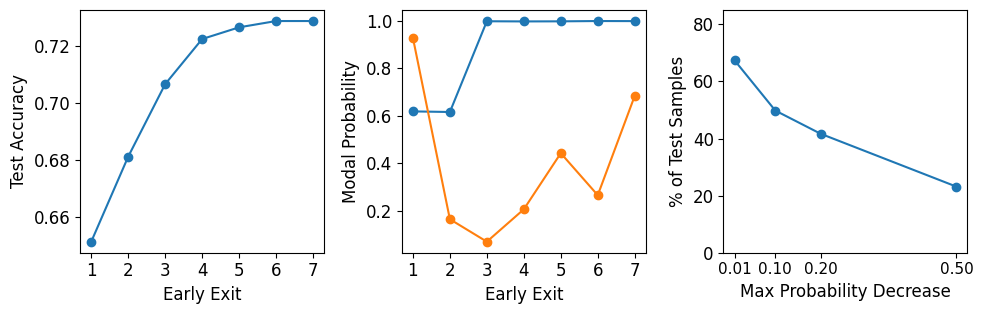

In [21]:
FONT_SIZE = 12
plt.rcParams.update({'font.size': FONT_SIZE})

PLOT_TYPE = 'Modal Probability'
# PLOT_TYPE = 'Ground-Truth Probability'

fig, ax = plt.subplots(1, 3, figsize=(10, 3.3))
early_exits = [i + 1 for i in range(L)]

ax[0].plot(early_exits, acc, label='NN', marker='o')
ax[0].set_xlabel('Early Exit')
ax[0].set_ylabel('Test Accuracy')
ax[0].set_xticks(early_exits)

ax[1].set_xlabel('Early Exit')
ax[1].set_ylabel(PLOT_TYPE)
if PLOT_TYPE == 'Modal Probability':
    for i in [6311, 8376]:
        probs_i = probs[:, i, preds[L - 1][i]].cpu()
        ax[1].plot(list(range(1, len(probs_i) + 1)), probs_i, marker='o')
elif PLOT_TYPE == 'Ground-Truth Probability':
    for i in [6311, 6534]:
        probs_i = probs[:, i, targets[i]].cpu()
        ax[1].plot(list(range(1, len(probs_i) + 1)), probs_i, marker='o')
ax[1].set_xticks(early_exits)

THRESHOLDS = [-0.01, -0.1, -0.2, -0.5]
ax[2].set_xlabel('Max Probability Decrease')
ax[2].set_ylabel('% of Test Samples')
if PLOT_TYPE == 'Modal Probability':
    probs_decrase = modal_probs_decreasing(preds, probs, L, N=N, diffs_type="all", thresholds=THRESHOLDS)
elif PLOT_TYPE == 'Ground-Truth Probability':
    probs_decrase = modal_probs_decreasing(targets, probs, layer=None, N=N, diffs_type="all", thresholds=THRESHOLDS)
print(probs_decrase)
ax[2].plot(probs_decrase.keys(), probs_decrase.values(), marker='o')
# ax[2].set_xticks(list(probs_decrase.keys()), [int(i * 100) for i in probs_decrase.keys()])
ax[2].set_xticks(list(probs_decrase.keys()))
ax[2].tick_params(labelsize=11, axis='x')
ax[2].set_ylim([0., 85.])

plt.tight_layout()
# plt.savefig(f'figures/figure_1_{PLOT_TYPE}.pdf', dpi=1200)
plt.show()

TODO: add plot for maximum-softmax-probability decreases